In [1]:
import numpy as np
import pandas as pd
import pandas as pd
pd.options.display.max_columns=100
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
import nltk
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords
wn = nltk.WordNetLemmatizer()
from nltk.stem import PorterStemmer
stemming =PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')
#ps = nltk.PorterStemmer()
import re
import string
from bs4 import BeautifulSoup
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import *
from sklearn.model_selection import *
import warnings
warnings.simplefilter('ignore')
import gc
from scipy.special import softmax
from sklearn.model_selection import train_test_split
import datetime as dt
import time
import nltk
from string import punctuation
from nltk.tokenize import punkt
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
import catboost as ctb

import joblib as jb

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nehem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nehem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data =pd.read_csv('labeled_tweets.csv')

In [4]:
data.drop_duplicates(inplace = True)
data.drop(['id'], axis = 1, inplace = True)

In [5]:
data.sample(4,random_state=40)

,label,full_text
7626,Non-offensive,Like when @GMShivers said that only industry n...
5192,Non-offensive,I'm so sick of Kat n Andre scraping through by...
4091,Non-offensive,"""Follow #ElieEliaWorld\nايلي ايليا\nTwi\nhtt..."
10855,Non-offensive,&#8220;@Queendev_: My leave out is trash &#128...


In [6]:
data.head()

,label,full_text
0,Offensive,So Drasko just said he was impressed the girls...
2,Offensive,Drasko they didn't cook half a bird you idiot ...
4,Offensive,Hopefully someone cooks Drasko in the next ep ...
6,Offensive,of course you were born in serbia...you're as ...
7,Offensive,These girls are the equivalent of the irritati...


In [7]:
data.shape

(11877, 2)

In [8]:
data.columns

Index(['label', 'full_text'], dtype='object')

In [9]:
# No of missing values
data.isnull().sum()

label        0
full_text    0
dtype: int64

In [10]:
data['label'].value_counts()

Non-offensive    6822
Offensive        5055
Name: label, dtype: int64

In [11]:
data['label']=data['label'].map({'Non-offensive':0,'Offensive':1 })

In [12]:
data.dtypes

label         int64
full_text    object
dtype: object

In [13]:
non_Bullying = data[data['label']==0]
Bullying = data[data['label']==1]

In [14]:
def What_Happened(data):
    negative = data[data['label']==1]
    positive = data[data['label']==0]
    neutral = data[data['label']==2]
    print('==' * 15, 'CyberBullying & Non-cyberbullying Tweet ANALYSIS', '==' * 15)
    print('\n')
    print()
    print('Total Labelled Tweets were: ', data.shape[0])
    print('non_bullying Tweets: ',len(non_Bullying))
    print('bullying Tweets: ', len(Bullying))

In [15]:
What_Happened(data)

============================== CyberBullying & Non-cyberbullying Tweet ANALYSIS ==============================



Total Labelled Tweets were:  11877
non_bullying Tweets:  6822
bullying Tweets:  5055


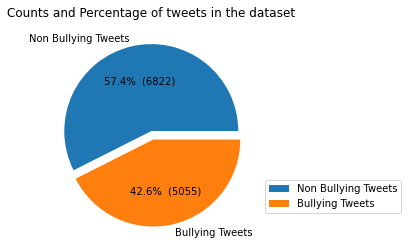

In [16]:
#Function to plot pie chart with specific format
def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
explode = (0,0.1)
fig1,ax1 = plt.subplots()
sizes = list((len(non_Bullying), len(Bullying)))
lb = ['Negative Tweets', 'Positive Tweets',  'Neutral Tweets']
lb = ['Non Bullying Tweets', 'Bullying Tweets']

plt.pie(sizes, labels=lb, explode = explode, autopct=make_autopct(sizes))
plt.title('Counts and Percentage of tweets in the dataset')
ax1.legend(loc='best',bbox_to_anchor=(1,0.3))
plt.show()

In [17]:
import string
def word_counts(sentence):
    return len(sentence)
data['word counts'] = data['full_text'].apply(word_counts)

#Estimate the percentage of punctuation marks in each tweet
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['full_text'].apply(lambda x: count_punct(x))

## WORD CLOUD ANALYSIS

In [18]:
def gettext(tweet):
    text = BeautifulSoup(tweet, 'html.parser')
    return text.get_text()

def removehurls(tweet):
    return re.sub(r'http\S+', '', tweet)

def removesymbols(tweet):
    re.sub(r'^\x00-\x7F+', '', tweet)
    return re.sub('[@!.,\/&)?:#...-'']', '', tweet)

def removestopwords(tweet):
    new_message = []
    tweet = tweet.lower()
    tweet = word_tokenize(tweet)
    sw = stopwords.words('english')
    for msg in tweet:
        if msg not in sw:
            new_message.append(msg) 
    return ' '.join(new_message)

def preparetweet(tweet):
    tweet = gettext(tweet)
    tweet = removehurls(tweet)
    tweet = removesymbols(tweet)
    tweet = removestopwords(tweet)
    return tweet

In [19]:
# For Analysis purpose; removing noise such as stop words, urls and symbols etc from the tweets
data['processed_tweet'] = data['full_text'].apply(preparetweet)
data['word counts'] = data['processed_tweet'].apply(word_counts)
data

,label,full_text,word counts,punct%,processed_tweet
0,1,So Drasko just said he was impressed the girls...,68,3.7,drasko said impressed girls cooked half chicke...
2,1,Drasko they didn't cook half a bird you idiot ...,35,4.9,drasko n't cook half bird idiot mkr
4,1,Hopefully someone cooks Drasko in the next ep ...,42,2.3,hopefully someone cooks drasko next ep mkr
6,1,of course you were born in serbia...you're as ...,49,8.1,course born serbiayou 're fucked serbian film mkr
7,1,These girls are the equivalent of the irritati...,72,4.9,girls equivalent irritating asian girls couple...
...,...,...,...,...,...
11957,1,@BitchImFancy lol so retarded,25,3.8,bitchimfancy lol retarded
11958,1,@BitchImaStunna @VeshaaCouture lmao bitch shut up,44,4.5,bitchimastunna veshaacouture lmao bitch shut
11959,1,@BitchMedia what's up my bitches?! Shout out f...,56,8.7,bitchmedia 's bitches shout momz cali keep doi...
11960,1,@Bitcheslovestar The only one of Mary's friend...,69,20.9,bitcheslovestar one mary 's friends like bitch...


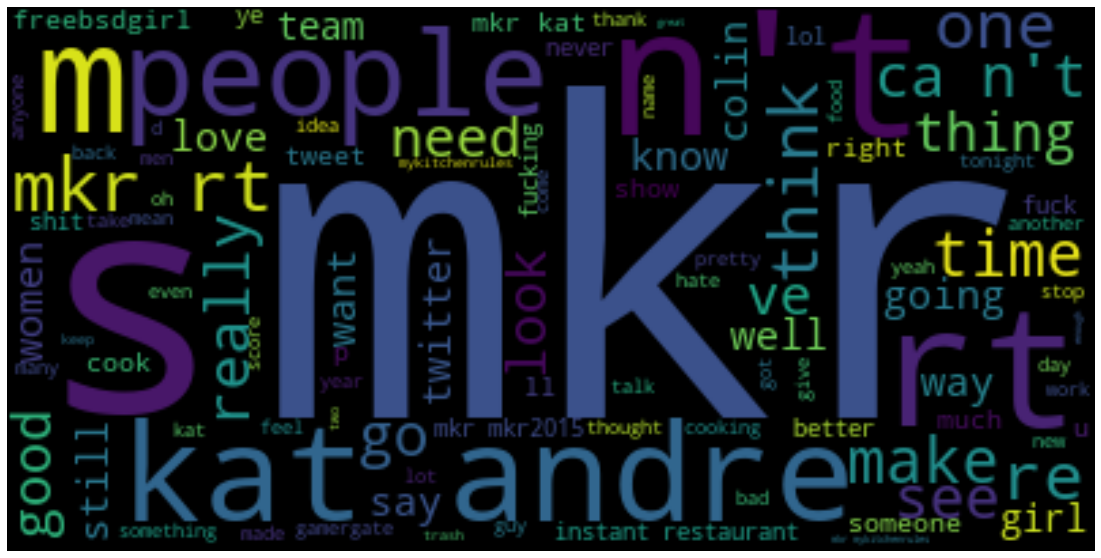

In [20]:
# View of overtly mentioned non bullying words using Wordcloud
from wordcloud import WordCloud, STOPWORDS


# Create a word cloud image
wc = WordCloud(background_color="black", max_words=100, 
               stopwords=STOPWORDS, contour_width=3, contour_color='black')

non_bullying_words = ' '.join(list(data[data['label'] == 0]['processed_tweet']))
# Generate a wordcloud
wc.generate(non_bullying_words)


# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

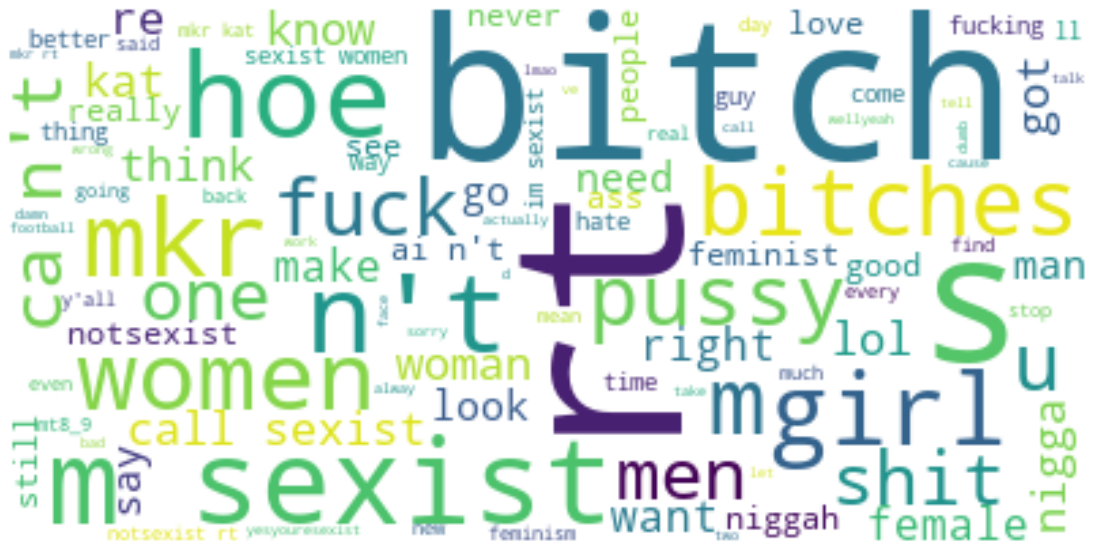

In [21]:
#To do this, we need WORDCLOUD Library
from wordcloud import WordCloud, STOPWORDS

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, contour_width=3, contour_color='black')

bullying_words = ' '.join(list(data[data['label'] == 1]['processed_tweet']))
# Generate a wordcloud
wc.generate(bullying_words)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## UNIGRAM ANALYSIS

<AxesSubplot:>

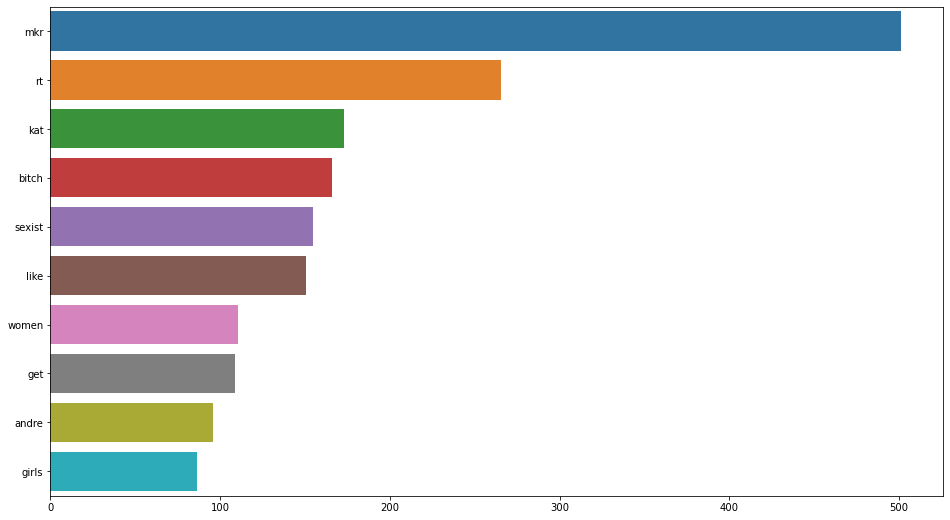

In [22]:
def get_top_text_ngrams(corpus, n, g):
    vec = TfidfVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
plt.figure(figsize = (16,9))
frequent_words = get_top_text_ngrams(data.processed_tweet,10,1)
frequent_words = dict(frequent_words)
sns.barplot(x=list(frequent_words.values()),y=list(frequent_words.keys()))

# BIVARIATE ANALYSIS

<AxesSubplot:>

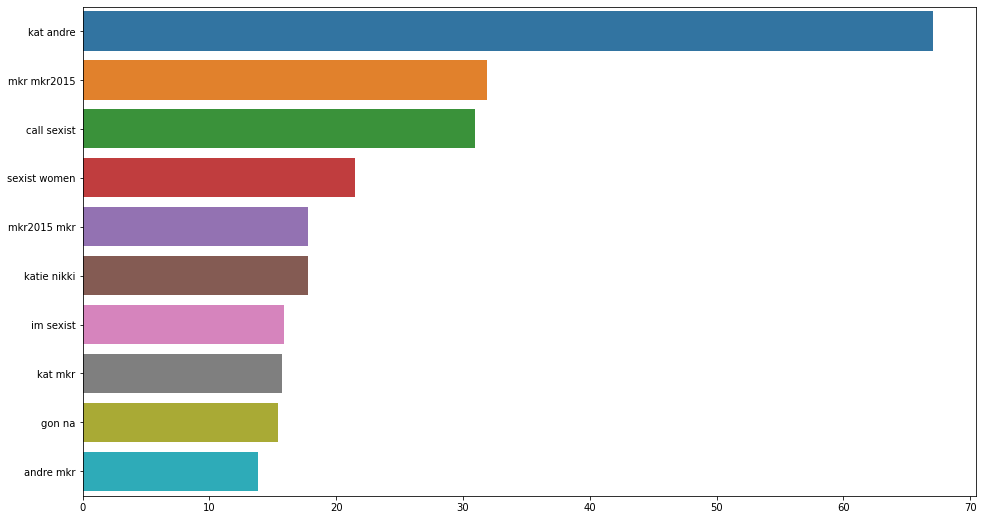

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_top_text_ngrams(corpus, n, g):
    vec = TfidfVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
plt.figure(figsize = (16,9))
frequent_word_bi = get_top_text_ngrams(data.processed_tweet,10,2)
frequent_word_bi = dict(frequent_word_bi)
sns.barplot(x=list(frequent_word_bi.values()),y=list(frequent_word_bi.keys()))

## Trigram Analysis

<AxesSubplot:>

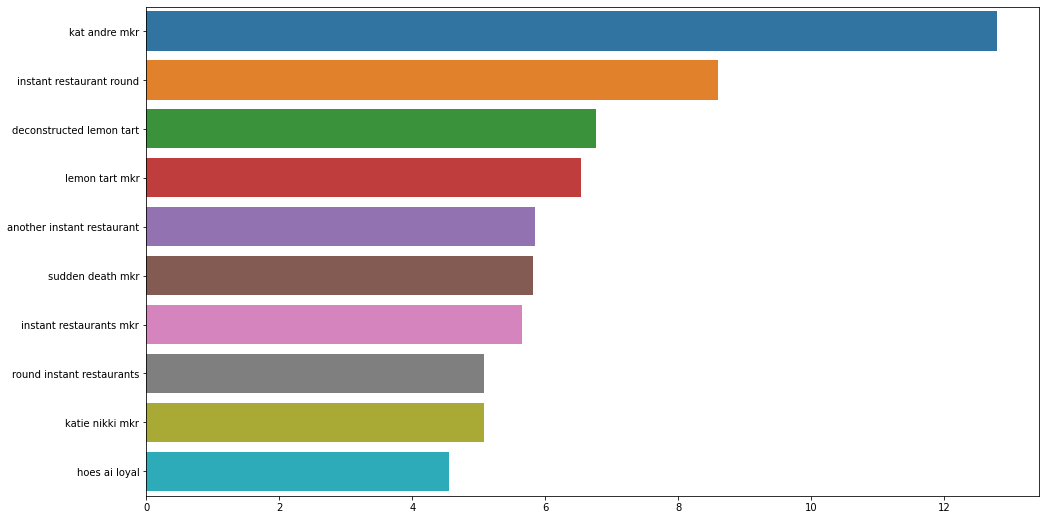

In [24]:
plt.figure(figsize = (16,9))
frequent_word_tri = get_top_text_ngrams(data.processed_tweet,10,3)
frequent_word_tri = dict(frequent_word_tri)
sns.barplot(x=list(frequent_word_tri.values()),y=list(frequent_word_tri.keys()))

# Predictive Analytics

In [25]:
data.columns

Index(['label', 'full_text', 'word counts', 'punct%', 'processed_tweet'], dtype='object')

In [26]:
data.head()

,label,full_text,word counts,punct%,processed_tweet
0,1,So Drasko just said he was impressed the girls...,68,3.7,drasko said impressed girls cooked half chicke...
2,1,Drasko they didn't cook half a bird you idiot ...,35,4.9,drasko n't cook half bird idiot mkr
4,1,Hopefully someone cooks Drasko in the next ep ...,42,2.3,hopefully someone cooks drasko next ep mkr
6,1,of course you were born in serbia...you're as ...,49,8.1,course born serbiayou 're fucked serbian film mkr
7,1,These girls are the equivalent of the irritati...,72,4.9,girls equivalent irritating asian girls couple...


In [27]:
data= data[["full_text","label"]]

In [28]:
data.columns

Index(['full_text', 'label'], dtype='object')

### CREATING THE MODEL

In [29]:
df_x = data['full_text']
df_y = data['label']

In [30]:
corpus = df_x
cv = CountVectorizer()
X = cv.fit_transform(corpus)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.20, random_state=42)

In [32]:
X_train

<9501x20962 sparse matrix of type '<class 'numpy.int64'>'
	with 129616 stored elements in Compressed Sparse Row format>

## SMOTE TECHNIQUE

In [37]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [38]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [39]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 5453, 1: 4048})
After SMOTE : Counter({0: 5453, 1: 5453})


In [40]:
# Naive Bayes Classifier classification report
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train_smote, y_train_smote)
predicted = NB.predict(X_test)
report= classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1369
           1       0.86      0.81      0.83      1007

    accuracy                           0.86      2376
   macro avg       0.86      0.86      0.86      2376
weighted avg       0.86      0.86      0.86      2376



In [42]:
# Random Forest Classifier classification report
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_smote,y_train_smote)
predicted = rf.predict(X_test)
report= classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1369
           1       0.72      0.81      0.76      1007

    accuracy                           0.79      2376
   macro avg       0.78      0.79      0.78      2376
weighted avg       0.79      0.79      0.79      2376



In [43]:
# Catbost Classifier classification report
CBC = ctb.CatBoostClassifier()
CBC.fit(X_train_smote, y_train_smote)
predicted = CBC.predict(X_test)
report= classification_report(y_test, predicted)
print(report)

Learning rate set to 0.028577
0:	learn: 0.6798773	total: 236ms	remaining: 3m 55s
1:	learn: 0.6668770	total: 317ms	remaining: 2m 38s
2:	learn: 0.6540599	total: 402ms	remaining: 2m 13s
3:	learn: 0.6433290	total: 522ms	remaining: 2m 9s
4:	learn: 0.6341339	total: 612ms	remaining: 2m 1s
5:	learn: 0.6259890	total: 676ms	remaining: 1m 51s
6:	learn: 0.6185144	total: 740ms	remaining: 1m 45s
7:	learn: 0.6099806	total: 826ms	remaining: 1m 42s
8:	learn: 0.6036874	total: 890ms	remaining: 1m 38s
9:	learn: 0.5966922	total: 952ms	remaining: 1m 34s
10:	learn: 0.5923247	total: 1.02s	remaining: 1m 31s
11:	learn: 0.5865870	total: 1.08s	remaining: 1m 29s
12:	learn: 0.5807198	total: 1.15s	remaining: 1m 26s
13:	learn: 0.5778466	total: 1.21s	remaining: 1m 25s
14:	learn: 0.5723272	total: 1.27s	remaining: 1m 23s
15:	learn: 0.5673866	total: 1.35s	remaining: 1m 23s
16:	learn: 0.5616968	total: 1.43s	remaining: 1m 22s
17:	learn: 0.5561761	total: 1.49s	remaining: 1m 21s
18:	learn: 0.5513424	total: 1.56s	remaining: 1

162:	learn: 0.4323598	total: 11.5s	remaining: 59s
163:	learn: 0.4320472	total: 11.6s	remaining: 58.9s
164:	learn: 0.4318343	total: 11.6s	remaining: 58.8s
165:	learn: 0.4314244	total: 11.7s	remaining: 58.8s
166:	learn: 0.4311863	total: 11.8s	remaining: 58.7s
167:	learn: 0.4308679	total: 11.8s	remaining: 58.6s
168:	learn: 0.4305860	total: 11.9s	remaining: 58.5s
169:	learn: 0.4303004	total: 12s	remaining: 58.4s
170:	learn: 0.4299893	total: 12s	remaining: 58.3s
171:	learn: 0.4296468	total: 12.1s	remaining: 58.2s
172:	learn: 0.4292128	total: 12.1s	remaining: 58.1s
173:	learn: 0.4289389	total: 12.2s	remaining: 58s
174:	learn: 0.4286964	total: 12.3s	remaining: 57.9s
175:	learn: 0.4285316	total: 12.3s	remaining: 57.8s
176:	learn: 0.4281617	total: 12.4s	remaining: 57.7s
177:	learn: 0.4279352	total: 12.5s	remaining: 57.6s
178:	learn: 0.4277746	total: 12.6s	remaining: 57.6s
179:	learn: 0.4275719	total: 12.6s	remaining: 57.5s
180:	learn: 0.4273792	total: 12.7s	remaining: 57.5s
181:	learn: 0.427135

323:	learn: 0.3971373	total: 22.2s	remaining: 46.3s
324:	learn: 0.3968534	total: 22.3s	remaining: 46.2s
325:	learn: 0.3965227	total: 22.3s	remaining: 46.1s
326:	learn: 0.3963190	total: 22.4s	remaining: 46.1s
327:	learn: 0.3961338	total: 22.5s	remaining: 46s
328:	learn: 0.3958154	total: 22.5s	remaining: 45.9s
329:	learn: 0.3956139	total: 22.6s	remaining: 45.9s
330:	learn: 0.3953627	total: 22.6s	remaining: 45.8s
331:	learn: 0.3952267	total: 22.7s	remaining: 45.7s
332:	learn: 0.3949213	total: 22.8s	remaining: 45.6s
333:	learn: 0.3947219	total: 22.8s	remaining: 45.5s
334:	learn: 0.3944395	total: 22.9s	remaining: 45.5s
335:	learn: 0.3943024	total: 23s	remaining: 45.4s
336:	learn: 0.3941010	total: 23s	remaining: 45.3s
337:	learn: 0.3939693	total: 23.1s	remaining: 45.3s
338:	learn: 0.3936693	total: 23.2s	remaining: 45.2s
339:	learn: 0.3934757	total: 23.3s	remaining: 45.2s
340:	learn: 0.3932667	total: 23.3s	remaining: 45.1s
341:	learn: 0.3929943	total: 23.4s	remaining: 45s
342:	learn: 0.392687

484:	learn: 0.3655001	total: 32.8s	remaining: 34.8s
485:	learn: 0.3653636	total: 32.8s	remaining: 34.7s
486:	learn: 0.3652084	total: 32.9s	remaining: 34.6s
487:	learn: 0.3649984	total: 33s	remaining: 34.6s
488:	learn: 0.3648647	total: 33s	remaining: 34.5s
489:	learn: 0.3647733	total: 33.1s	remaining: 34.4s
490:	learn: 0.3645999	total: 33.1s	remaining: 34.4s
491:	learn: 0.3645293	total: 33.2s	remaining: 34.3s
492:	learn: 0.3644010	total: 33.3s	remaining: 34.2s
493:	learn: 0.3642389	total: 33.3s	remaining: 34.1s
494:	learn: 0.3640792	total: 33.4s	remaining: 34.1s
495:	learn: 0.3638554	total: 33.5s	remaining: 34s
496:	learn: 0.3637093	total: 33.5s	remaining: 33.9s
497:	learn: 0.3635529	total: 33.6s	remaining: 33.9s
498:	learn: 0.3633951	total: 33.7s	remaining: 33.8s
499:	learn: 0.3632739	total: 33.7s	remaining: 33.7s
500:	learn: 0.3629955	total: 33.8s	remaining: 33.7s
501:	learn: 0.3628164	total: 33.9s	remaining: 33.6s
502:	learn: 0.3627479	total: 33.9s	remaining: 33.5s
503:	learn: 0.3626

644:	learn: 0.3430672	total: 43.1s	remaining: 23.7s
645:	learn: 0.3429213	total: 43.2s	remaining: 23.6s
646:	learn: 0.3428059	total: 43.2s	remaining: 23.6s
647:	learn: 0.3426739	total: 43.3s	remaining: 23.5s
648:	learn: 0.3425398	total: 43.4s	remaining: 23.4s
649:	learn: 0.3424688	total: 43.4s	remaining: 23.4s
650:	learn: 0.3423150	total: 43.5s	remaining: 23.3s
651:	learn: 0.3422118	total: 43.6s	remaining: 23.3s
652:	learn: 0.3420854	total: 43.6s	remaining: 23.2s
653:	learn: 0.3418697	total: 43.7s	remaining: 23.1s
654:	learn: 0.3417321	total: 43.8s	remaining: 23.1s
655:	learn: 0.3416815	total: 43.8s	remaining: 23s
656:	learn: 0.3415601	total: 43.9s	remaining: 22.9s
657:	learn: 0.3414545	total: 44s	remaining: 22.9s
658:	learn: 0.3413461	total: 44s	remaining: 22.8s
659:	learn: 0.3412280	total: 44.1s	remaining: 22.7s
660:	learn: 0.3410738	total: 44.2s	remaining: 22.7s
661:	learn: 0.3408861	total: 44.2s	remaining: 22.6s
662:	learn: 0.3408208	total: 44.3s	remaining: 22.5s
663:	learn: 0.3406

806:	learn: 0.3268966	total: 53.9s	remaining: 12.9s
807:	learn: 0.3268264	total: 54s	remaining: 12.8s
808:	learn: 0.3267814	total: 54.1s	remaining: 12.8s
809:	learn: 0.3266339	total: 54.1s	remaining: 12.7s
810:	learn: 0.3265796	total: 54.2s	remaining: 12.6s
811:	learn: 0.3265505	total: 54.3s	remaining: 12.6s
812:	learn: 0.3264779	total: 54.3s	remaining: 12.5s
813:	learn: 0.3263649	total: 54.4s	remaining: 12.4s
814:	learn: 0.3262722	total: 54.5s	remaining: 12.4s
815:	learn: 0.3262364	total: 54.5s	remaining: 12.3s
816:	learn: 0.3260853	total: 54.6s	remaining: 12.2s
817:	learn: 0.3259623	total: 54.7s	remaining: 12.2s
818:	learn: 0.3258975	total: 54.8s	remaining: 12.1s
819:	learn: 0.3258568	total: 54.8s	remaining: 12s
820:	learn: 0.3258281	total: 54.9s	remaining: 12s
821:	learn: 0.3257285	total: 55s	remaining: 11.9s
822:	learn: 0.3255993	total: 55s	remaining: 11.8s
823:	learn: 0.3255174	total: 55.1s	remaining: 11.8s
824:	learn: 0.3254886	total: 55.2s	remaining: 11.7s
825:	learn: 0.3254617	

966:	learn: 0.3143655	total: 1m 4s	remaining: 2.22s
967:	learn: 0.3143091	total: 1m 5s	remaining: 2.15s
968:	learn: 0.3141904	total: 1m 5s	remaining: 2.08s
969:	learn: 0.3141666	total: 1m 5s	remaining: 2.02s
970:	learn: 0.3140601	total: 1m 5s	remaining: 1.95s
971:	learn: 0.3139777	total: 1m 5s	remaining: 1.88s
972:	learn: 0.3139449	total: 1m 5s	remaining: 1.81s
973:	learn: 0.3139207	total: 1m 5s	remaining: 1.75s
974:	learn: 0.3138056	total: 1m 5s	remaining: 1.68s
975:	learn: 0.3137629	total: 1m 5s	remaining: 1.61s
976:	learn: 0.3136505	total: 1m 5s	remaining: 1.55s
977:	learn: 0.3136260	total: 1m 5s	remaining: 1.48s
978:	learn: 0.3135724	total: 1m 5s	remaining: 1.41s
979:	learn: 0.3134614	total: 1m 5s	remaining: 1.34s
980:	learn: 0.3134370	total: 1m 5s	remaining: 1.28s
981:	learn: 0.3133583	total: 1m 6s	remaining: 1.21s
982:	learn: 0.3132781	total: 1m 6s	remaining: 1.14s
983:	learn: 0.3132415	total: 1m 6s	remaining: 1.08s
984:	learn: 0.3131551	total: 1m 6s	remaining: 1.01s
985:	learn: 

In [48]:
# Decision tree Classifier classification report
DT = DecisionTreeClassifier()
DT.fit(X_train_smote, y_train_smote)
predicted = DT.predict(X_test)
report= classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1369
           1       0.68      0.80      0.74      1007

    accuracy                           0.76      2376
   macro avg       0.76      0.77      0.76      2376
weighted avg       0.77      0.76      0.76      2376



In [49]:
# Support vector machine classification report
Svm = LinearSVC()
Svm.fit(X_train_smote, y_train_smote)
predicted = Svm.predict(X_test)
report= classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1369
           1       0.76      0.84      0.80      1007

    accuracy                           0.82      2376
   macro avg       0.82      0.82      0.82      2376
weighted avg       0.82      0.82      0.82      2376



In [50]:
# Accuracy of our Model
print("Naives bayes Model",NB.score(X_test,y_test)*100,"%")
print("Random forest Model",rf.score(X_test,y_test)*100,"%")
print("Catboost classifier",CBC.score(X_test,y_test)*100,"%")
print("Decision tree classifier",DT.score(X_test,y_test)*100,"%")
print("Support vector machine",Svm.score(X_test,y_test)*100,"%")

Naives bayes Model 86.27946127946127 %
Random forest Model 78.70370370370371 %
Catboost classifier 86.23737373737373 %
Decision tree classifier 76.01010101010101 %
Support vector machine 81.94444444444444 %


In [51]:
## Predicting with our model
NB.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [52]:
# Sample Prediciton
comment = ["mad people and so stupid"]
vect = cv.transform(comment).toarray()

In [53]:
NB.predict(vect)

array([1], dtype=int64)

In [54]:
class_dict = {'Non-Bullying':0,'Bullying':1}

In [55]:
class_dict.values()

dict_values([0, 1])

In [56]:
if NB.predict(vect) == 1:
    print("Tweet is Bullying")
else:
    print("Tweet is not Non-Bullying")

Tweet is Bullying


In [57]:
# Sample Prediciton 2
comment1 = ["Great people and nice to hear"]
vect = cv.transform(comment1).toarray()
NB.predict(vect)

array([0], dtype=int64)

In [58]:
if NB.predict(vect) == 1:
    print("Tweet is Bullying")
else:
    print("Tweet is not Non-Bullying")

Tweet is not Non-Bullying


In [59]:
naivebayesML = open("Naives_model.pkl","wb")

In [60]:
import pickle

In [61]:
pickle.dump(NB,naivebayesML)

In [62]:
naivebayesML.close()

In [63]:
cyber_model = open("Naives_model.pkl","rb")

In [64]:
new_model = pickle.load(cyber_model)

In [65]:
# Sample Prediciton 3
comment2 = ["mad people and so stupid"]
vect = cv.transform(comment2).toarray()
new_model.predict(vect)

array([1], dtype=int64)

In [66]:
if new_model.predict(vect) == 1:
    print("Tweet is Bullying")
else:
    print("Tweet is not Non-Bullying")

Tweet is Bullying
